In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32ec56a2fd41dff554fc7a9d3a037363


In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [13]:
 # Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kirakira
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | tidore
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | namatanai
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | bonavista
Processing Record 16 of Set 1 | warqla
City not found. Skipping...
Processing Record 17 of Set 1 | mutoko
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | henties bay
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Pr

Processing Record 39 of Set 4 | vagamo
Processing Record 40 of Set 4 | isangel
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | pimentel
Processing Record 43 of Set 4 | zhob
Processing Record 44 of Set 4 | roura
Processing Record 45 of Set 4 | inegol
Processing Record 46 of Set 4 | skjervoy
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | pauini
Processing Record 49 of Set 4 | chernitsyno
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | lavrentiya
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | banatski karlovac
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | senekal
Processing Record 7 of Set 5 | coruripe
Processing Record 8 of Set 5 | bilma
Processing Record 9 of Set 5 | hakui
Processing Record 10 of Set 5 | iberia
Processing Record 11 of Set 5 | lasa
Processing Record 12 of S

Processing Record 32 of Set 8 | pomorie
Processing Record 33 of Set 8 | kavaratti
Processing Record 34 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 35 of Set 8 | zabalj
Processing Record 36 of Set 8 | neuquen
Processing Record 37 of Set 8 | kamiiso
Processing Record 38 of Set 8 | santa cruz
Processing Record 39 of Set 8 | mbandaka
Processing Record 40 of Set 8 | lucapa
Processing Record 41 of Set 8 | umm lajj
Processing Record 42 of Set 8 | pringsewu
Processing Record 43 of Set 8 | aksarayskiy
Processing Record 44 of Set 8 | sampit
Processing Record 45 of Set 8 | mergui
City not found. Skipping...
Processing Record 46 of Set 8 | marzuq
Processing Record 47 of Set 8 | tepalcatepec
Processing Record 48 of Set 8 | high level
Processing Record 49 of Set 8 | namibe
Processing Record 50 of Set 8 | talcahuano
Processing Record 1 of Set 9 | rio verde de mato grosso
Processing Record 2 of Set 9 | eyl
Processing Record 3 of Set 9 | dobson
Processing Record 4 of Set 9 | bur

Processing Record 23 of Set 12 | port hawkesbury
Processing Record 24 of Set 12 | westport
Processing Record 25 of Set 12 | akaltara
Processing Record 26 of Set 12 | kaputa
Processing Record 27 of Set 12 | bandarbeyla
Processing Record 28 of Set 12 | khandagayty
Processing Record 29 of Set 12 | luwuk
Processing Record 30 of Set 12 | the valley
Processing Record 31 of Set 12 | lac du bonnet
Processing Record 32 of Set 12 | tomohon
Processing Record 33 of Set 12 | marienburg
Processing Record 34 of Set 12 | energetik
Processing Record 35 of Set 12 | sunrise manor
Processing Record 36 of Set 12 | neiafu
Processing Record 37 of Set 12 | srivardhan
Processing Record 38 of Set 12 | khash
Processing Record 39 of Set 12 | osakarovka
Processing Record 40 of Set 12 | de-kastri
Processing Record 41 of Set 12 | banda aceh
Processing Record 42 of Set 12 | ozgon
City not found. Skipping...
Processing Record 43 of Set 12 | sinnamary
Processing Record 44 of Set 12 | matagami
Processing Record 45 of Se

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kirakira,-10.4544,161.9205,77.92,89,100,8.14,SB,2022-01-27 04:50:05
1,Yellowknife,62.4560,-114.3525,4.41,89,100,4.61,CA,2022-01-27 04:45:52
2,Mataura,-46.1927,168.8643,58.48,44,47,7.11,NZ,2022-01-27 04:50:06
3,Namatanai,-3.6667,152.4333,84.38,72,72,5.75,PG,2022-01-27 04:50:06
4,Port Elizabeth,-33.9180,25.5701,67.10,100,100,8.05,ZA,2022-01-27 04:49:41
5,Karratha,-20.7377,116.8463,90.23,45,1,19.46,AU,2022-01-27 04:50:07
6,Dikson,73.5069,80.5464,11.37,93,100,28.72,RU,2022-01-27 04:50:07
7,Nikolskoye,59.7035,30.7861,25.88,94,100,10.07,RU,2022-01-27 04:50:08
8,Hobart,-42.8794,147.3294,80.22,67,75,1.99,AU,2022-01-27 04:50:08
9,Punta Arenas,-53.1500,-70.9167,50.11,76,40,21.85,CL,2022-01-27 04:50:09


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

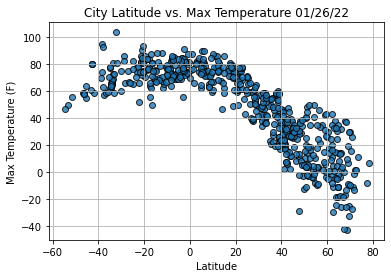

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

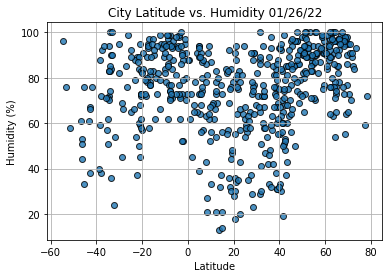

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

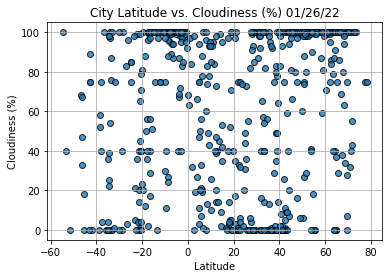

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


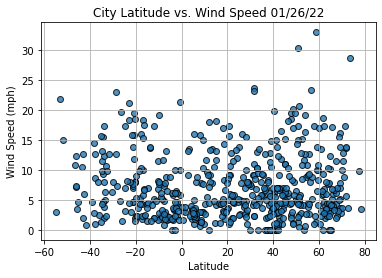

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
index13 = city_data_df.loc[13]
index13

City                       Mutoko
Lat                       -17.397
Lng                       32.2268
Max Temp                    64.24
Humidity                       95
Cloudiness                     96
Wind Speed                   4.38
Country                        ZW
Date          2022-01-27 04:50:10
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Yellowknife,62.4560,-114.3525,4.41,89,100,4.61,CA,2022-01-27 04:45:52
6,Dikson,73.5069,80.5464,11.37,93,100,28.72,RU,2022-01-27 04:50:07
7,Nikolskoye,59.7035,30.7861,25.88,94,100,10.07,RU,2022-01-27 04:50:08
11,Tura,25.5198,90.2201,65.37,59,36,5.01,IN,2022-01-27 04:50:09
12,Bonavista,48.6499,-53.1147,29.12,69,100,20.22,CA,2022-01-27 04:50:10


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

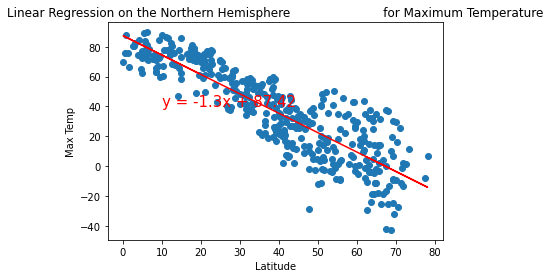

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

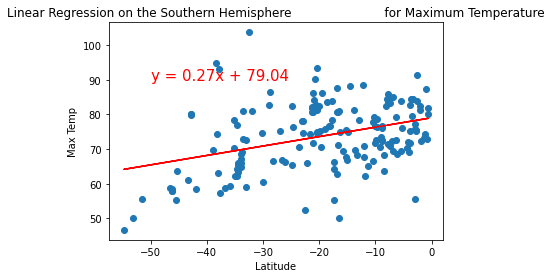

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

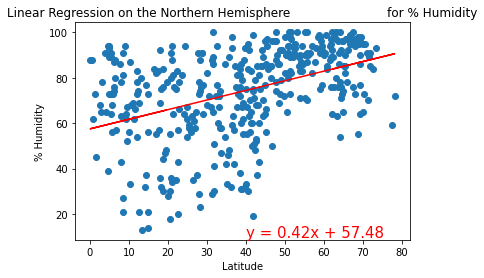

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

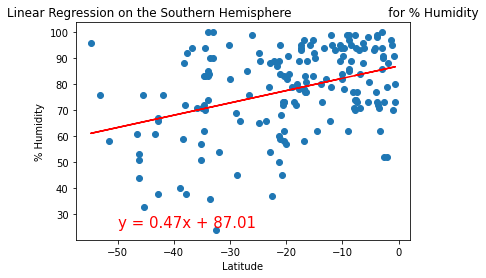

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

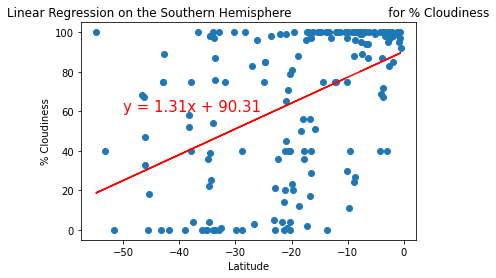

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

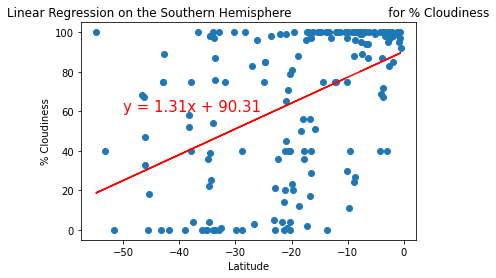

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

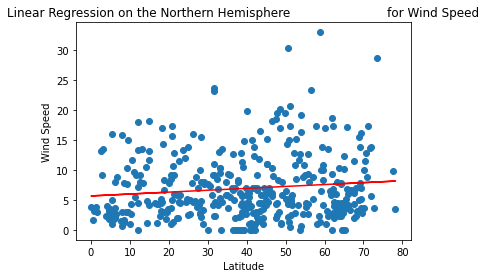

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

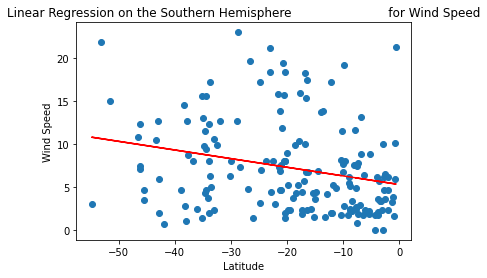

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))